============================= test session starts ==============================
platform darwin -- Python 3.7.3, pytest-4.3.1, py-1.8.0, pluggy-0.9.0

Running tests with astroplan version 0.4.
Running tests in anaconda3/lib/python3.7/site-packages/astroplan.

Date: 2019-04-12T11:54:55

Platform: Darwin-18.5.0-x86_64-i386-64bit

Executable: /Users/karelland/anaconda3/bin/python

Full Python Version: 
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

encodings: sys: utf-8, locale: UTF-8, filesystem: utf-8
byteorder: little
float info: dig: 15, mant_dig: 15

Numpy: 1.16.2
Scipy: 1.2.1
Matplotlib: 3.0.3
Pandas: 0.24.2
Astropy: 3.1.2
pytz: 2018.9
pyephem: not available
matplotlib: 3.0.3
nose: 1.3.7
pytest-mpl: not available
astropy_helpers: 3.1
Using Astropy options: remote_data: none.

rootdir: /Users/karelland, inifile:
plugins: remotedata-0.3.1, openfiles-0.3.2, doctestplus-0.3.0, arraydiff-0.3
collected 76 items

../../anaconda3/lib/python3.7/site-packages

anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_scheduling_target_down
anaconda3/lib/python3.7/site-packages/astroplan/tests/test_scheduling.py::test_sch

1

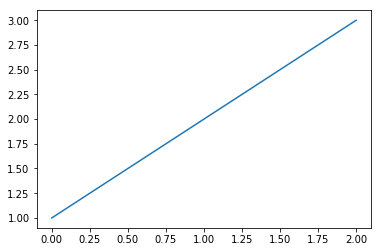

In [18]:
#installation of astroplan from conda install -c astropy astroplan see https://buildmedia.readthedocs.org/media/pdf/astroplan/latest/astroplan.pdf
import astroplan
astroplan.test()

In [2]:
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates) "or altair = FixedTarget.from_name('Altair')"

In [43]:
#specification of your own observatory
import astropy.units as u
from astropy.coordinates import EarthLocation
from pytz import timezone
from astroplan import Observer

In [9]:
"example with subaru"
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
observer = Observer(name='Subaru Telescope',
            location=location,
            pressure=0.615 * u.bar,
            relative_humidity=0.11,
            temperature=0 * u.deg_C,
            timezone=timezone('US/Hawaii'),
            description="Subaru Telescope on Maunakea, Hawaii")
subaru = Observer.at_site('subaru')

In [54]:
from astropy.time import Time
time = Time('2019-06-12 12:00:00')#Time in UTC 
#sunset: in UTC, to be converted in Hawaiian time
sunset_tonight = subaru.sun_set_time(time, which='nearest')
sunset_tonight.iso

'2019-06-12 04:57:06.127'

In [55]:
#sunrise in UTC
sunrise_tonight = subaru.sun_rise_time(time, which='nearest')
sunrise_tonight.iso

'2019-06-12 15:46:17.219'

In [56]:
#Use of 3 famous stars as example for our calculation of observing time window for this 3 stars simultaneously
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget
altair = FixedTarget.from_name('Altair')
vega = FixedTarget.from_name('Vega')
coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)
import numpy as np
import astropy.units as u
altair_rise = subaru.target_rise_time(time, altair) + 5*u.minute
altair_set = subaru.target_set_time(time, altair) - 5*u.minute
vega_rise = subaru.target_rise_time(time, vega) + 5*u.minute
vega_set = subaru.target_set_time(time, vega) - 5*u.minute
deneb_rise = subaru.target_rise_time(time, deneb) + 5*u.minute
deneb_set = subaru.target_set_time(time, deneb) - 5*u.minute
all_up_start = np.max([altair_rise, vega_rise, deneb_rise])
all_up_end = np.min([altair_set, vega_set, deneb_set])
#Definition of limited time window
start = np.max([sunset_tonight, all_up_start])
start.iso

'2019-06-12 06:44:26.260'

In [57]:
end = np.min([sunrise_tonight, all_up_end])
end.iso

'2019-06-12 15:46:17.219'

In [58]:
#determination of time window for all 3 stars
start = np.max([sunset_tonight, all_up_start])
start.iso

'2019-06-12 06:44:26.260'

In [59]:
end = np.min([sunrise_tonight, all_up_end])
end.iso

'2019-06-12 15:46:17.219'

In [60]:
#So, our targets will be visible from ‘2019-06-11 20:44:26.260’ to ‘2019-06-12
#05:46:17.219’ Hawaii time. We may want to optimize our observational conditions.

In [61]:
############### AIRMASS

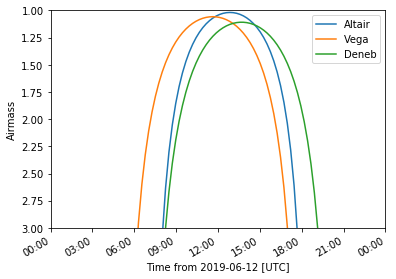

In [62]:
from astroplan.plots import plot_airmass
import matplotlib.pyplot as plt
plot_airmass(altair, subaru, time)
plot_airmass(vega, subaru, time)
plot_airmass(deneb, subaru, time)
plt.legend(loc=1, bbox_to_anchor=(1, 1))
plt.show()

In [63]:
#We want a minimum airmass when observing, and it looks like sometime between 9:00 and 15:00 UTC (or 23:00 on
#the 15th to 5:00 on the 16th, US/Hawaii) would be the best time to observe all three targets.
#However, if we want to define a more specific time window based on airmass, we can calculate this quantity directly.
#To get airmass measurements, we need to use the AltAz frame subaru.altaz(time, altair).secz

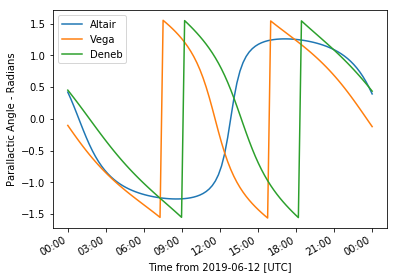

In [69]:
#parallactic angle
import matplotlib.pyplot as plt
from astroplan.plots import plot_parallactic
plot_parallactic(altair, subaru, time)
plot_parallactic(vega, subaru, time)
plot_parallactic(deneb, subaru, time)
plt.legend(loc=2)
plt.show()
# possibility to have the angle subaru.parallactic_angle(time, deneb)

In [71]:
###MOOON Check
subaru.moon_rise_time(time)

<Time object: scale='utc' format='jd' value=2458646.504024011>

In [72]:
subaru.moon_set_time(time)

<Time object: scale='utc' format='jd' value=2458645.9824272096>

In [73]:
subaru.moon_altaz(time).alt

<Latitude 3.61454745 deg>

In [74]:
subaru.moon_altaz(time).az

<Longitude 264.86921803 deg>

In [75]:
visible_time = start + (end - start)*np.linspace(0, 1, 20)

In [76]:
subaru.moon_altaz(visible_time).alt

<Latitude [ 66.43210508,  63.3100339 ,  58.95654336,  53.81738169,
            48.18611484,  42.24199332,  36.09431819,  29.81162262,
            23.43853607,  17.00532925,  10.53341698,   4.03865022,
            -2.46660788,  -8.97206753, -15.4684274 , -21.94638677,
           -28.39553983, -34.80287403, -41.15040443, -47.41102406] deg>

AttributeError: Unknown property frac

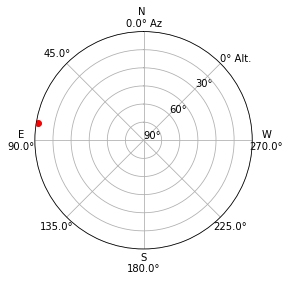

In [79]:
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt
altair_style = {'color': 'r'}
deneb_style = {'color': 'g'}
plot_sky(altair, subaru, start, style_kwargs=altair_style)
plot_sky(vega, subaru, start)
plot_sky(deneb, subaru, start, style_kwargs=deneb_style)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()
plot_sky(altair, subaru, end, style_kwargs=altair_style)
plot_sky(vega, subaru, end)
plot_sky(deneb, subaru, end, style_kwargs=deneb_style)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()
